<h1> User Engagement Analysis </h2>

<h2> Imporing data and packages </h2>

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sqlite3
import pickle # for dumping regression model to a file.

import sys
import warnings
sys.path.insert(1, "../scripts")
warnings.filterwarnings('ignore')

In [2]:
# Suppressing warning messages

warnings.filterwarnings('ignore')

In [3]:
# setting path to file and folders

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
models_dir = os.path.join(parent_dir, "models") # setiing path to models directory
data_path = os.path.join(parent_dir,"data","teleco_user_exp_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

In [4]:
# Importing scripts

from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar
import database_manager as db_man

cleaner = Cleaner()
sumar = Sumar()

In [5]:
# Importing the users data frame with experience and engagement score

user_df= pd.read_csv(data_path)

In [6]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MSISDN/Number      106856 non-null  float64
 1   xDr_session_count  106856 non-null  int64  
 2   session_dur        106856 non-null  float64
 3   Handset            106856 non-null  object 
 4   Total_DL           106856 non-null  float64
 5   Total_UL           106856 non-null  float64
 6   total_vol          106856 non-null  float64
 7   RTT total          106856 non-null  float64
 8   TP total           106856 non-null  float64
 9   TCP total          106856 non-null  float64
 10  youtube            106856 non-null  float64
 11  netflix            106856 non-null  float64
 12  google             106856 non-null  float64
 13  gaming             106856 non-null  float64
 14  email              106856 non-null  float64
 15  social             106856 non-null  float64
 16  ot

<h2> User Satisfaction Exploration

In [7]:
# creating a new satisfaction score column based on exp_score and eng_score.

user_df["sat_score"] = user_df[["eng_score", "exp_score"]].mean(axis=1)
sumar.summ_columns(user_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,float64,106856
1,xDr_session_count,0,0.0,int64,18
2,session_dur,0,0.0,float64,74492
3,Handset,0,0.0,object,1394
4,Total_DL,0,0.0,float64,106851
5,Total_UL,0,0.0,float64,106715
6,total_vol,0,0.0,float64,106853
7,RTT total,0,0.0,float64,787
8,TP total,0,0.0,float64,28856
9,TCP total,0,0.0,float64,29986


In [8]:
# showing the top 10 users based on user experience metrics

sumar.show_N_per_col(user_df, "MSISDN/Number", ["sat_score"], 10)


Top 10 customers based on sat_score

       MSISDN/Number  sat_score
6437    3.361489e+10  99.070284
76363   3.367588e+10  79.937081
13526   3.362632e+10  69.518837
37052   3.365973e+10  69.161538
92923   3.376054e+10  68.596873
13180   3.362578e+10  66.284985
35436   3.365936e+10  62.717825
30225   3.365826e+10  59.339502
92577   3.376041e+10  58.472185
57241   3.366471e+10  56.197079


<h2> Creating a regression model

In [9]:
# Creating features and target.
#x = feature/independant variables
#y = target / dependant variable

x = user_df[["xDr_session_count", "session_dur", "total_vol", "RTT total", "TP total", "TCP total"]]
y = user_df["sat_score"]

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# gnerate model
model = sumar.generateModel(x_train, y_train)

y_prediction =  model.predict(x_test)
y_prediction


Model created Sucessfully.


array([27.88338134, 27.45432276, 26.65470898, ..., 18.51285913,
       20.3451821 , 22.78325463])

In [10]:
# predicting the accuracy score

score=r2_score(y_test,y_prediction)
print("r2 socre is ",score)

r2 socre is  0.797537020729264


In [11]:
# Saving model to file

filename = 'pridict_satisfaction_model.sav'
file_loc = os.path.join(models_dir,filename)
pickle.dump(model, open(file_loc, 'wb'))
print("MODEL SAVED SUCCESSFULLY.")

MODEL SAVED SUCCESSFULLY.


In [26]:
# checking saved model

loaded_model = pickle.load(open(file_loc, 'rb'))
result = loaded_model.score(x_test, y_test)
result

0.797537020729264

<h2>clustering based on experience and engagement

In [12]:
# selecting features

selected_features = ["eng_score", "exp_score"]
normalised_df, data_with_clusters, kmeans = sumar.clusterGenerator(user_df, selected_features, 2, "Clusters_exp_eng")

In [13]:
# aggregating by clusters

clus_df = sumar.find_agg(data_with_clusters, "Clusters_exp_eng",["eng_score", "exp_score", "MSISDN/Number"], ["mean", "mean", "count"], ["eng_mean", "exp_mean", "user_count"])


In [14]:
# showing the top 10 satisfied customers based on user experience and engagement scores

sumar.show_N_per_col(clus_df, "Clusters_exp_eng", ["eng_mean", "exp_mean", "user_count"], 10)


Top 10 customers based on eng_mean

   Clusters_exp_eng   eng_mean
1                 1  24.175862
0                 0  14.149127

Top 10 customers based on exp_mean

   Clusters_exp_eng   exp_mean
1                 1  30.083437
0                 0  22.729777

Top 10 customers based on user_count

   Clusters_exp_eng  user_count
1                 1       84272
0                 0       22584


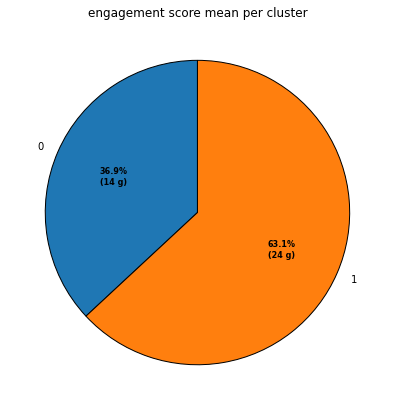

In [15]:
sumar.plot_pie(clus_df, ["Clusters_exp_eng", "eng_mean"], "engagement score mean per cluster")

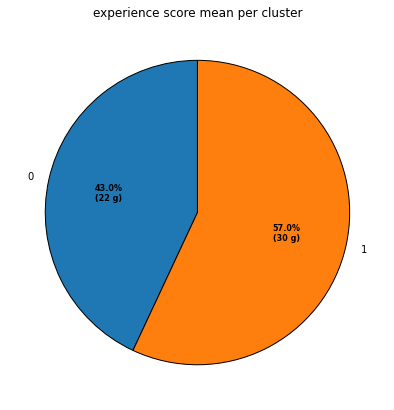

In [16]:
sumar.plot_pie(clus_df, ["Clusters_exp_eng", "exp_mean"], "experience score mean per cluster")

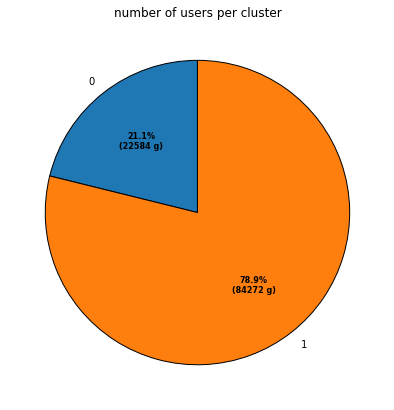

In [17]:
sumar.plot_pie(clus_df, ["Clusters_exp_eng", "user_count"], "number of users per cluster")

**Observation**
<li> the majority of the users are in cluster 0. 
<li> cluster 0 has users with higher experience and engagement score
<li> so the majority of the users are generally engaged and have better experience.

<h2> saving dataframe to database

In [18]:
# saving users engagement, experience and satisfaction socre to file.
user_scores_df = user_df[["MSISDN/Number", "eng_score", "exp_score", "sat_score"]]
user_scores_df.head()

,MSISDN/Number,eng_score,exp_score,sat_score
0,3.360100e+10,22.302560,31.268994,26.785777
1,3.360100e+10,24.442388,32.104480,28.273434
2,3.360100e+10,23.092519,31.047598,27.070059
3,3.360101e+10,25.763501,30.042978,27.903239
4,3.360101e+10,19.485558,21.232561,20.359059


In [19]:
# create db

db_name = "teleco_data"
db_man.createDB(db_name)
print("database successfully created")

database successfully created


In [20]:
# connect to db

db_man.DBConnect(db_name)
print("database successfully connected")

database successfully connected


In [21]:
# create table

schema = os.path.join(scripts_dir,"table_schema.sql")
db_man.createTables(db_name, schema)
print("table successfully created")

table successfully created


In [22]:
# save dataframe to table

db_man.insert_into_table(db_name, user_scores_df.loc[:100], "teleco_users")
print("data_frame successfully inserted to database")

Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
D

In [27]:
save_data_path_5 = os.path.join(parent_dir,"data","teleco_user_sat_data.csv") # setting path to data directory
data_with_clusters.to_csv(save_data_path_5, index=False)